## Implement Value at Risk & Conditional Value at Risk using:    

- Historical Method    
- Parametric Method (Variance-Covariance)
- Monte Carlo Method

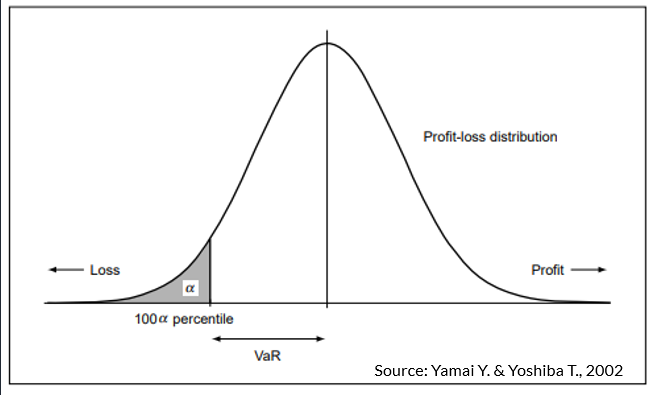

In [15]:
%pip install pandas_datareader -q


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install yfinance -q


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm, t
import matplotlib.pyplot as plt

## Get the Historical Data

First let’s import the dependencies and get the data! We also assign random weightings to the given stock portfoio. Please feel free to change these weightings to whatever allocation you’d like!

- $\text{Expected Portfolio Return} = \sum_i (\text{Mean Return}_i \times \text{Weight}_i)\times \text{time}$

- Correlation matrix:
$$
\text{cov}(X,Y) = 
\begin{bmatrix}
\text{Cov}(X_1, X_1) & \text{Cov}(X_1, X_2) & \ldots & \text{Cov}(X_1, X_n) \\
\text{Cov}(X_2, X_1) & \text{Cov}(X_2, X_2) & \ldots & \text{Cov}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_n, X_1) & \text{Cov}(X_n, X_2) & \ldots & \text{Cov}(X_n, X_n)
\end{bmatrix}
$$

 where $\text{Cov}(X_i, X_j) = E[(X_i - \mu_{X_i}) * (X_j - \mu_{X_j})]$

- Daily Change = Current Value - Previous Value

In [18]:
# Import data
import yfinance as yf

def getData(stocks, start, end):
    stockData = pd.DataFrame()  # Empty DataFrame to store stock data
    for stock in stocks:
        data = yf.download(stock, start=start, end=end)
        stockData = pd.concat([stockData, data['Close']], axis=1)
    stockData.columns = stocks  # Set column names as stock symbols
    returns = stockData.pct_change() 
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix


# Portfolio Performance
def portfolioPerformance(weights, meanReturns, covMatrix, Time):
    returns = np.sum(meanReturns*weights)*Time
    std = np.sqrt( np.dot(weights.T, np.dot(covMatrix, weights)) ) * np.sqrt(Time)
    return returns, std

In [19]:
stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock+'.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()

weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

returns['portfolio'] = returns.dot(weights)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
returns

,CBA.AX,BHP.AX,TLS.AX,NAB.AX,WBC.AX,STO.AX,portfolio
2021-04-27,0.003144,0.011288,0.000000,-0.001875,-0.003589,0.007257,0.000663
2021-04-28,0.009851,-0.003307,0.005917,0.011274,0.012405,0.011527,0.008210
2021-04-29,-0.002328,0.009125,-0.002941,-0.005203,-0.004348,0.004274,-0.002170
2021-04-30,-0.010667,-0.019729,0.000000,-0.004109,-0.008337,-0.009929,-0.007023
2021-05-03,0.007412,-0.014046,0.029498,0.021380,0.050040,-0.022923,0.024848
...,...,...,...,...,...,...,...
2023-06-27,0.005106,0.014848,-0.004640,0.007040,0.015957,0.000000,0.006310
2023-06-28,0.011277,0.006872,0.011655,0.019417,0.018563,0.012295,0.013835
2023-06-29,0.005324,-0.010348,-0.004608,0.003810,0.000935,0.006748,-0.000597
2023-06-30,0.001999,0.000890,-0.004630,0.000759,-0.003735,0.008043,-0.001763


In [21]:
meanReturns

CBA.AX    0.000336
BHP.AX    0.000088
TLS.AX    0.000489
NAB.AX    0.000081
WBC.AX   -0.000181
STO.AX    0.000368
dtype: float64

In [22]:
covMatrix

,CBA.AX,BHP.AX,TLS.AX,NAB.AX,WBC.AX,STO.AX
CBA.AX,0.000169,0.000045,0.000039,0.000112,0.000108,0.000057
BHP.AX,0.000045,0.000378,0.000020,0.000037,0.000043,0.000165
TLS.AX,0.000039,0.000020,0.000098,0.000037,0.000029,0.000021
NAB.AX,0.000112,0.000037,0.000037,0.000154,0.000118,0.000052
WBC.AX,0.000108,0.000043,0.000029,0.000118,0.000165,0.000053
STO.AX,0.000057,0.000165,0.000021,0.000052,0.000053,0.000357


In [23]:
weights

array([0.2081064 , 0.10094025, 0.30025069, 0.10839083, 0.2743893 ,
       0.00792253])

## Historical VaR


Historical VaR = Portfolio Value * (1 - Confidence Level) * Return at the Selected Percentile



In [37]:
# Here we make no assumptions about the distribution of returns.
def historicalVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the percentile of the distribution at the given alpha confidence level
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

def historicalCVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the CVaR for dataframe / series
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= historicalVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalCVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

In [38]:
# 100 days
Time = 100

hVaR = -historicalVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
hCVaR = -historicalCVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
pRet, pStd = portfolioPerformance(weights, meanReturns, covMatrix, Time)

InitialInvestment = 10000
print('Expected Portfolio Return:      ', round(InitialInvestment*pRet,2))
print('Value at Risk 95th CI    :      ', round(InitialInvestment*hVaR,2))
print('Conditional VaR 95th CI  :      ', round(InitialInvestment*hCVaR,2))

Expected Portfolio Return:       187.52
Value at Risk 95th CI    :       1542.3
Conditional VaR 95th CI  :       2100.83


## Simulation

Here we make an assumption on the distribution of returns abd use the historical portfolio returns and standard deviations (estimates) to define parameters for the model. Here we have implemented two parametric VaR models:

- normal distribution
- t-distribution (fatter tails)

In [32]:
def var_parametric(portofolioReturns, portfolioStd, distribution='normal', alpha=5, dof=6):
    # because the distribution is symmetric
    if distribution == 'normal':
        VaR = norm.ppf(1-alpha/100)*portfolioStd - portofolioReturns
    elif distribution == 't-distribution':
        nu = dof
        VaR = np.sqrt((nu-2)/nu) * t.ppf(1-alpha/100, nu) * portfolioStd - portofolioReturns
    else:
        raise TypeError("Expected distribution type 'normal'/'t-distribution'")
    return VaR

def cvar_parametric(portofolioReturns, portfolioStd, distribution='normal', alpha=5, dof=6):
    if distribution == 'normal':
        CVaR = (alpha/100)**-1 * norm.pdf(norm.ppf(alpha/100))*portfolioStd - portofolioReturns
    elif distribution == 't-distribution':
        nu = dof
        xanu = t.ppf(alpha/100, nu)
        CVaR = -1/(alpha/100) * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu) * portfolioStd - portofolioReturns
    else:
        raise TypeError("Expected distribution type 'normal'/'t-distribution'")
    return CVaR

normVaR = var_parametric(pRet, pStd)
normCVaR = cvar_parametric(pRet, pStd)

tVaR = var_parametric(pRet, pStd, distribution='t-distribution')
tCVaR = cvar_parametric(pRet, pStd, distribution='t-distribution')

print("Normal VaR 95th CI       :      ", round(InitialInvestment*normVaR,2))
print("Normal CVaR 95th CI      :      ", round(InitialInvestment*normCVaR,2))
print("t-dist VaR 95th CI       :      ", round(InitialInvestment*tVaR,2))
print("t-dist CVaR 95th CI      :      ", round(InitialInvestment*tCVaR,2))

Normal VaR 95th CI       :       1263.6
Normal CVaR 95th CI      :       1632.25
t-dist VaR 95th CI       :       1212.21
t-dist CVaR 95th CI      :       1714.69


## Monte Carlo VaR & CVaR

- In this section we use a Monte Carlo simulation of a stock portfolio and then use the functions for historical VaR and CVaR to calculate our risk parameters.

- The main advantage here is we could define individual models/stock dynamics for individual assets. This can be very powerful!

In [33]:
# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

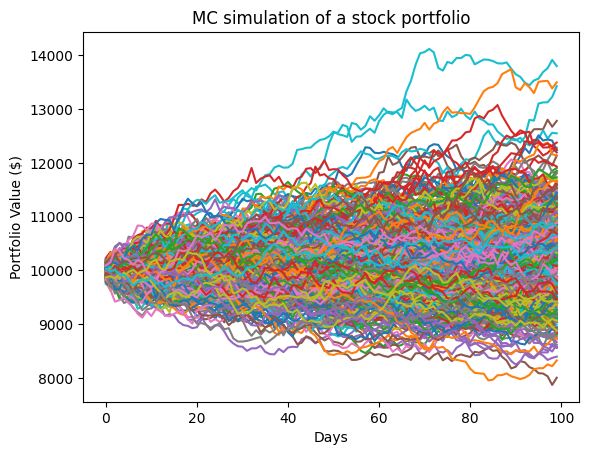

In [27]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [34]:
def mcVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: percentile on return distribution to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

def mcCVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: CVaR or Expected Shortfall to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError("Expected a pandas data series.")

In [35]:
portResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portResults, alpha=5)
CVaR = initialPortfolio - mcCVaR(portResults, alpha=5)

print('VaR ${}'.format(round(VaR,2)))
print('CVaR ${}'.format(round(CVaR,2)))

VaR $1237.99
CVaR $1489.14


In [36]:
print("\nVaR:")

print(' historical VaR 95th CI   :      ', round(InitialInvestment*hVaR,2))
print(" Normal VaR 95th CI       :      ", round(InitialInvestment*normVaR,2))
print(" t-dist VaR 95th CI       :      ", round(InitialInvestment*tVaR,2))
print(" MC VaR  95th CI          :      ", round(VaR,2))


print("\nCVaR:")

print(' historical CVaR 95th CI  :      ', round(InitialInvestment*hCVaR,2))
print(" Normal CVaR 95th CI      :      ", round(InitialInvestment*normCVaR,2))
print(" t-dist CVaR 95th CI      :      ", round(InitialInvestment*tCVaR,2))
print(" MC CVaR 95th CI          :      ", round(CVaR,2))


VaR:
 historical VaR 95th CI   :       1542.3
 Normal VaR 95th CI       :       1263.6
 t-dist VaR 95th CI       :       1212.21
 MC VaR  95th CI          :       1237.99

CVaR:
 historical CVaR 95th CI  :       2100.83
 Normal CVaR 95th CI      :       1632.25
 t-dist CVaR 95th CI      :       1714.69
 MC CVaR 95th CI          :       1489.14
